# Logistic Regression From Scratch

Imagine We have data as follows:
- The X-axis represents age.
- The Y-axis indicates whether a person has heart disease (1) or not (0).

Abviously, as people get older, their chances of developing heart disease increase.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(42)
plt.figure(figsize=(6,3))

def skewed_random_vector(a, b, size, alpha=5, beta=2):
    # Generate a beta distribution
    beta_samples = np.random.beta(alpha, beta, size)
    # Scale the beta distribution to the range [a, b]
    scaled_samples = a + (b - a) * beta_samples
    
    return scaled_samples

X = []
Y = []
# Example usage
a = 1
b = 100
size = 20  # Number of random values
heart_disease_vector = skewed_random_vector(a, b, size, alpha=2, beta=1)
y = np.ones((heart_disease_vector.shape))
X += heart_disease_vector
Y += y
plt.scatter(heart_disease_vector,y, c='b')
a = 1
b = 100
healty_vector = skewed_random_vector(a, b, size, alpha=1, beta=3)
y = np.zeros((healty_vector.shape))
X += healty_vector
Y += y
plt.scatter(healty_vector,y, c='b')

plt.xlabel('Age')
plt.ylabel('Disease Class')
plt.title('Heart Disease Data')
plt.xlim(0,100)
plt.yticks([0,1],labels=['0 (No Heart Disease)','1 (Have Heart Disease)'])
plt.show()


ValueError: operands could not be broadcast together with shapes (0,) (20,) 

<Figure size 600x300 with 0 Axes>

Logistic regression aims to find a sigmoid function that best fits the data.

### Sigmoid Function
<!-- The logistic regression model uses the sigmoid function to map any real-valued number into a value between 0 and 1. Before maping
 -->
The logistic regression model uses the sigmoid function to map any real-valued number into a brobability between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-(x)}}
$$

$$

\hat{y} =
\begin{cases} 
1 & \text{if } \sigma(x) \geq 0.5 \\
0 & \text{if } \sigma(x) < 0.5 
\end{cases}

$$

Afterwards, if the predicted probability is higher tha 0.5 the predicted class $(\hat{y})$ will be 1 and if it is lower than 0.5 it will be 0.

To find such a function we need to adjust two parameters named $w$ (wheight) and $b$ (bias).

$$
\sigma(x) = \frac{1}{1 + e^{-(wx + b)}}
$$

In order to find the best values for w and b, we start with random values and calculate a cost function then try to minimize this cost function by updating w and b using gradient descent which is an optimization method.


### Cost Function (Cross Entropy)
The cost function for logistic regression is designed to penalize incorrect predictions. It is defined as:


$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right]
$$

$$h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}$$

where:
- $ m $ is the number of training examples.
- $( y_i )$ is the actual label of the $( i )$-th training example.
- $h_\theta(x_i)$ is the predicted probability for the $( i )$-th training example, given by the hypothesis function (Sigmoid).

In a simple case, $\theta$ inclues weight ($w$) and bias ($b$).

$$
J(w,b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right]
$$

$$h_\theta(x) = \sigma(x) = \frac{1}{1 + e^{-(w^Tx+b)}}$$


In order to minimize this cost function we need the derivatives of $(J)$ repect to $(w)$ and $(b)$. Let's calculate them.
For simplicity, we rewrite and rename these functions.

$$
J = -\left( y \log(h) + (1 - y) \log(1 - h) \right)
$$
$$
h = \sigma(z) = \frac{1}{1 + e^{-z}}
$$
$$
z = w^Tx+b
$$

For the derivatives, we use chain rule:

$$
\frac{\partial{J}}{\partial{w}} = \frac{\partial{J}}{\partial{h}} * \frac{\partial{h}}{\partial{z}} * \frac{\partial{z}}{\partial{w}}
$$

$$
\frac{\partial{J}}{\partial{b}} = \frac{\partial{J}}{\partial{h}} * \frac{\partial{h}}{\partial{z}} * \frac{\partial{z}}{\partial{b}}
$$

after the calculation:

$$
\frac{\partial{J}}{\partial{h}} = \frac{-y(1-h)+h(1-y)}{h(1-h)} = \frac{h-y}{h(1-h)}
$$

$$
\frac{\partial{h}}{\partial{z}} = \frac{e^{-z}}{(1+e^{-z})^2} = h(1-h)
$$

$$
\frac{\partial{z}}{\partial{w}} = x
$$

$$
\frac{\partial{z}}{\partial{b}} = 1
$$

Therefore:

$$
\frac{\partial{J}}{\partial{w}} = x (h-y)
$$

$$
\frac{\partial{J}}{\partial{b}} = h-y
$$


Then we use these derivatives to update w and b:

$$
w = w - \alpha \frac{\partial{J}}{\partial{w}}
$$

$$
b = b - \alpha \frac{\partial{J}}{\partial{b}}
$$

The derivative shows the slope of cost function respect to w and b. Therefore if is negative we increase the weight and if it is positive we decrease the weight.

<img src=".\files\gradient-descent.png" width="40%" style="background-color: white"/>

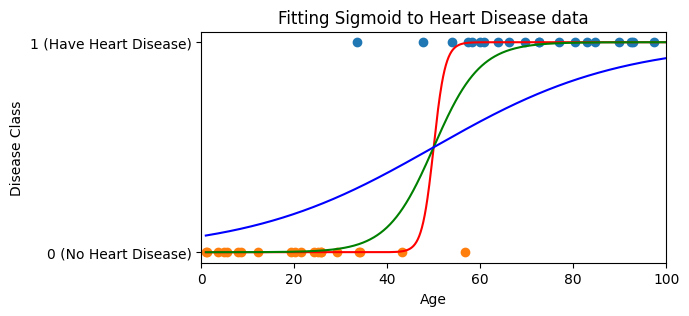

In [62]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(42)
plt.figure(figsize=(6,3))

def skewed_random_vector(a, b, size, alpha=5, beta=2):
    # Generate a beta distribution
    beta_samples = np.random.beta(alpha, beta, size)
    # Scale the beta distribution to the range [a, b]
    scaled_samples = a + (b - a) * beta_samples
    
    return scaled_samples

# Example usage
a = 1
b = 100
size = 20  # Number of random values
heart_disease_vector = skewed_random_vector(a, b, size, alpha=2, beta=1)
y = np.ones((heart_disease_vector.shape))
plt.scatter(heart_disease_vector,y)
a = 1
b = 100
healty_vector = skewed_random_vector(a, b, size, alpha=1, beta=3)
y = np.zeros((healty_vector.shape))
plt.scatter(healty_vector,y)


# Define the sigmoid function
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(w*(x+b))))

# Generate data points
z = np.linspace(1, 100, 1000)

list = [[0.8,-50, 'r'],[0.2,-50, 'g'],[0.05,-50, 'b']]

for l in list:
    
    y = sigmoid(z,l[0], l[1])
    # Plot the sigmoid function
    plt.plot(z, y, label = 'Sigmoid Function',c=l[2])

plt.xlabel('Age')
plt.ylabel('Disease Class')
plt.title('Fitting Sigmoid to Heart Disease data')
plt.xlim(0,100)
plt.yticks([0,1],labels=['0 (No Heart Disease)','1 (Have Heart Disease)'])
plt.show()


Logistic Regression is used for binay classification

Examples:

- Email is spam or not
- Transaction is fraud or not
- Tumor is malignant or benign

Also we need a metric to tell us how much the sigmoid function is good. We call such a function; Cost function.
Logistic Regression uses a Cross Entroy as cost fuction which is as follows:



### Why this Cost function works well?
- **When $(y_i=1)$**: The cost function simplifies to $(-\log(h_\theta(x_i)))$. If the predicted probability $h_\theta(x_i)$ is close to 1, the cost is low. If $h_\theta(x_i)$ is close to 0, the cost is high.
- **When $(y_i=0)$**: The cost function simplifies to $(-\log(1 - h_\theta(x_i)))$. If the predicted probability $h_\theta(x_i)$ is close to 0, the cost is low. If $h_\theta(x_i)$ is close to 1, the cost is high.

We can ckeck this explaination in the follwoing figure:
<!-- 
$$
J(\hat{y}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_{(i)} \log(\hat{y}_{(i)}) + (1 - y_{(i)}) \log(1 - \hat{y}_{(i)}) \right]
$$

$$
\text{when } (y_{(i)}=1) => J = -\log(\hat{y}_{(i)})
$$

$$
\text{when } (y_{(i)}=0) => J = -\log(1 - \hat{y}_{(i)})
$$ -->


<!-- 
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

$$
h_\theta(x) = \hat{y} = \sigma(w^{T}x + b)
$$ -->






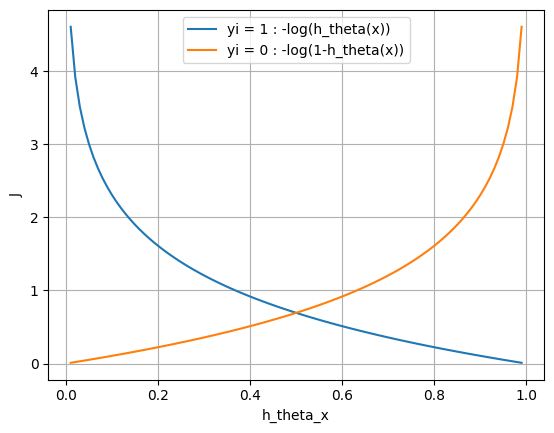

In [202]:
import matplotlib.pyplot as plt
import numpy as np

# Generate h_theta_x values from 0.1 to 10 (logarithm of 0 is undefined)
h_theta_x = np.linspace(0.01, 0.99, 100)
# Compute -log(x)
j = -np.log(h_theta_x)
j2 = -np.log(1-h_theta_x)

# Create the plot
plt.plot(h_theta_x, j, label='yi = 1 : -log(h_theta(x))')
plt.plot(h_theta_x, j2, label='yi = 0 : -log(1-h_theta(x))')

plt.xlabel('h_theta_x')
plt.ylabel('J')
plt.legend()
plt.grid(True)
plt.show()


In order to find the best value for $w$ and $b$, we use an optimization algorithm called Gradient Descent. First, we need to calculate the partial drivatives of the cost function: $\frac{\partial{J}}{\partial{w}} , \frac{\partial{J}}{\partial{b}}$


For simplicity, we denote the formulas as follow:


<!-- $$
\frac{\partial{J}}{\partial{w}}
$$ -->

## Logistic Regression Steps

### 2.1. **Data Collection**:

Gather the data that you will use for the logistic regression model. Ensure that your dataset includes the dependent variable (binary outcome) and the independent variables (predictors).


### 2.2. **Split the Data**: 

Divide the dataset into training and testing sets. Typically, an 80-20 or 70-30 split is used.

### 2.3. **Model Training**:

   - **Initialize the Model**: Create an instance of the logistic regression model.
   - **Fit the Model**: Train the model using the training data.

### 2.4. **Model Evaluation**:
   - **Predict on Test Data**: Use the trained model to make predictions on the test set.
   - **Confusion Matrix**: Create a confusion matrix to evaluate the performance of the model.
   - **Performance Metrics**: Calculate metrics such as accuracy, precision, recall, and F1-score.

### 2.5. **Model Tuning**: 

Adjust the model parameters to improve performance. This can include regularization techniques like L1 (Lasso) or L2 (Ridge).


Sigmoid gives us probability

### Logistic Regression Overview
Logistic regression is used for binary classification problems, where the outcome is either 0 or 1. It predicts the probability that a given input belongs to a particular class.

In linear regression we had a linear relation between data input $(x)$ and the continous predicted output $(\hat{y})$

$$
\hat{y} = w^{T}x + b
$$

In logistic regression, we aim to determine the probability that a data point belongs to class (0) or class (1).
We use sigmoid function:

### Sigmoid Function
<!-- The logistic regression model uses the sigmoid function to map any real-valued number into a value between 0 and 1. Before maping
 -->
The logistic regression model uses the sigmoid function to map any real-valued number into a brobability between 0 and 1.

$$
\sigma(\hat{y}) = \frac{1}{1 + e^{-(\hat{y})}} = \frac{1}{1 + e^{-(w^{T}x + b)}}
$$



In [161]:
# import numpy as np
# import matplotlib.pyplot as plt
# np.random.seed(42)

# # Define the sigmoid function
# def sigmoid(x):
#     return 1 / (1 + np.exp(-(x-40)))

# # Generate data points
# z = np.linspace(30, 50, 100)
# y = sigmoid(z)

# plt.figure(figsize=(8,4))
# # Plot the sigmoid function
# plt.plot(z, y, label = 'Sigmoid Function')

# plt.legend()
# plt.xlabel('z')
# plt.ylabel('Sigmoid(z)')
# plt.title('Sigmoid Function')
# plt.show()



### How to find the best w and b?

To find best w and b, we need a cost function to minimize iterativaly.

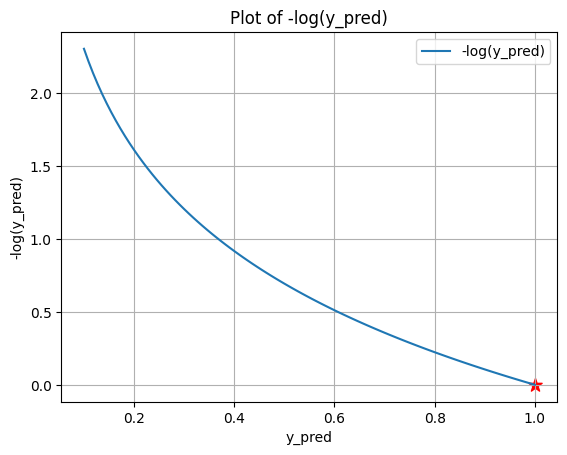

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from 0.1 to 10 (logarithm of 0 is undefined)
y_pred = np.linspace(0.1, 1, 100)
# Compute -log(x)
y = -np.log(y_pred)

# Create the plot
plt.plot(y_pred, y, label='-log(y_pred)')
y_pred = [1]
plt.scatter(y_pred,-np.log(y_pred), marker='*', s=100, c='r')
plt.xlabel('y_pred')
plt.ylabel('-log(y_pred)')
plt.title('Plot of -log(y_pred)')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# import matplotlib.pyplot as plt
# data = [
#         ]
# x = [i[0] for i in data]
# y = [i[1] for i in data]
# plt.scatter(x,y, marker='*')

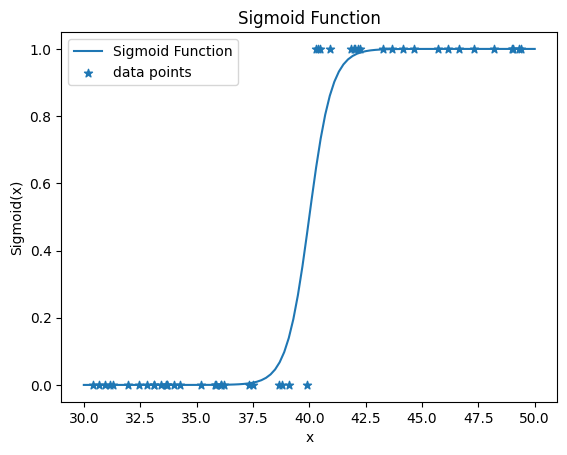

In [28]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-(2*(x-40))))

# Generate data points
x = np.linspace(30, 50, 100)
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y, label = 'Sigmoid Function')

x = np.random.uniform(30, 50, 50)
y = [1 if sigmoid(i)>0.5 else 0 for i in x]
plt.scatter(x, y, marker='*', label = 'data points')
plt.legend()
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Function')
# plt.grid(True)
plt.show()


Resources: 
- https://www.youtube.com/watch?v=x1ez9vi611I
- https://www.youtube.com/watch?v=yIYKR4sgzI8
- https://www.youtube.com/watch?v=YYEJ_GUguHw&list=PLcWfeUsAys2k_xub3mHks85sBHZvg24Jd&index=4

In [3]:
"""
From scratch implementation of Logistic Regression

Programmed by Aladdin Persson <aladdin.persson at hotmail dot com>
*    2020-05-24 Initial coding

"""

import numpy as np
from sklearn.datasets import make_blobs


class LogisticRegression:
    def __init__(self, X, learning_rate=0.1, num_iters=10000):
        self.lr = learning_rate
        self.num_iters = num_iters

        # m for #training_examples, n for #features
        self.m, self.n = X.shape
        self.X = X

    def train(self, X, y):
        # init weights
        self.weights = np.zeros((self.n, 1))
        self.bias = 0

        for it in range(self.num_iters + 1):
            # calculate hypothesis
            h_theta = self.sigmoid(np.dot(X, self.weights) + self.bias)

            # calculate cost
            cost = (
                -1
                / self.m
                * np.sum(y * np.log(h_theta) + (1 - y) * np.log(1 - h_theta))
            )

            # back prop / gradient calculations
            dw = 1 / self.m * np.dot(X.T, (h_theta - y))
            db = 1 / self.m * np.sum(h_theta - y)

            # gradient descent update step
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
                
            # print cost sometimes
            if it % 1000 == 0:
                plt.figure()
                plt.plot(self.X,)
                plt.plot(self.X,self.sigmoid(X))
                plt.show()
                print(f"Cost after iteration {it}: {cost}")

        return self.weights, self.bias

    def predict(self, X):
        h_theta = self.sigmoid(np.dot(X, self.weights) + self.bias)
        h_theta_labels = h_theta > 0.5

        return h_theta_labels

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


In [4]:
np.random.seed(1)
X, y = make_blobs(n_samples=1000, centers=2)
y = y[:, np.newaxis]


In [9]:
# X[0]

In [1]:

logreg = LogisticRegression(X)
w, b = logreg.train(X, y)
h_theta = logreg.predict(X)

print(f"Accuracy: {np.sum(y==h_theta)/X.shape[0]}")

# Code

X shape: (569, 30)
y shape: (569,)


C:\Users\barza\AppData\Local\Temp\ipykernel_14120\2725761456.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
C:\Users\barza\AppData\Local\Temp\ipykernel_14120\2725761456.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(z, y, 'b' , c = 'b' ,label = 'predicted sigmoid')


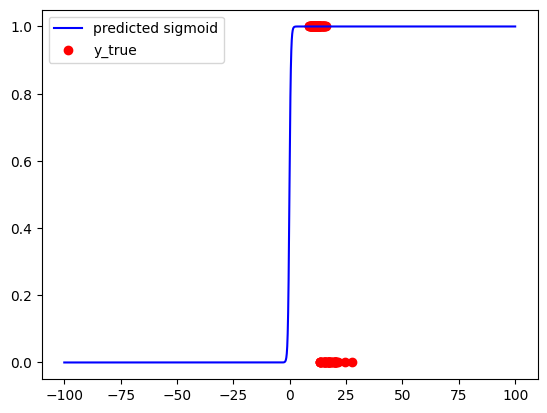

C:\Users\barza\AppData\Local\Temp\ipykernel_14120\2725761456.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(z, y, 'b' , c = 'b' ,label = 'predicted sigmoid')


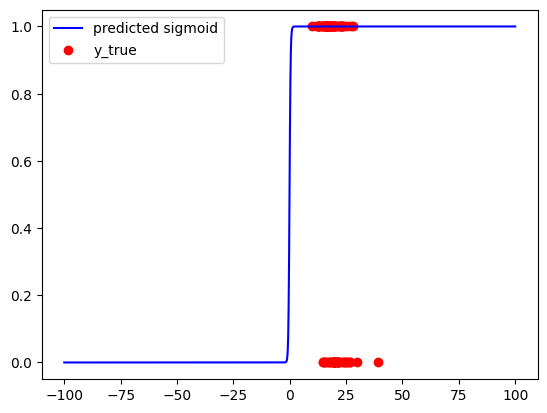

C:\Users\barza\AppData\Local\Temp\ipykernel_14120\2725761456.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-(w*x+b)))
C:\Users\barza\AppData\Local\Temp\ipykernel_14120\2725761456.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(z, y, 'b' , c = 'b' ,label = 'predicted sigmoid')


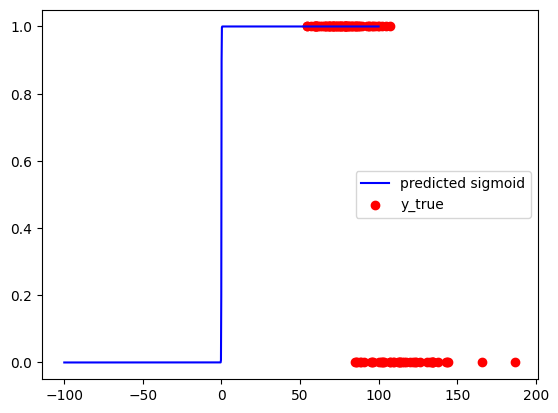

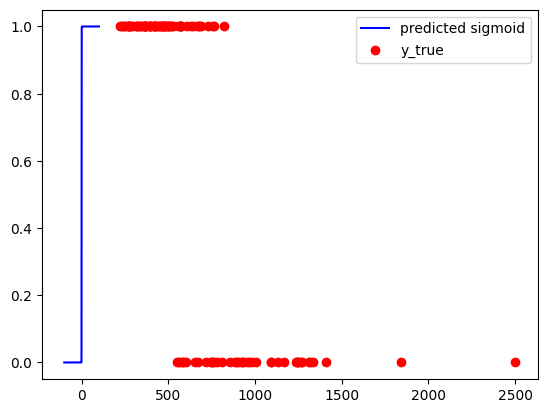

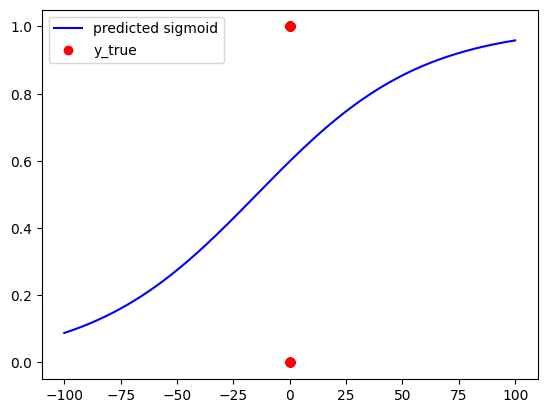

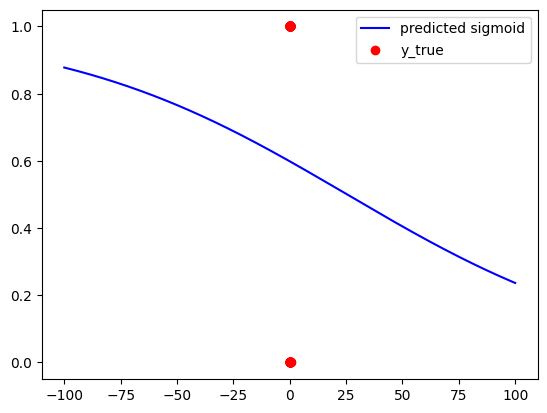

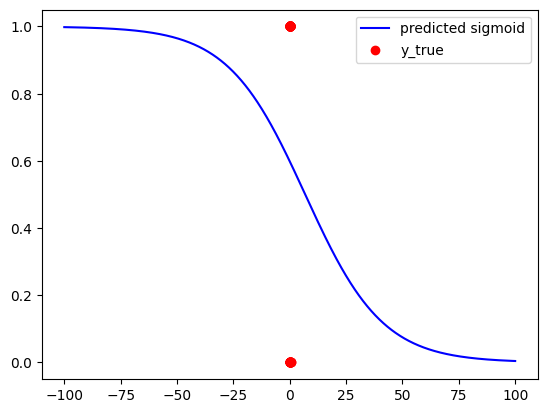

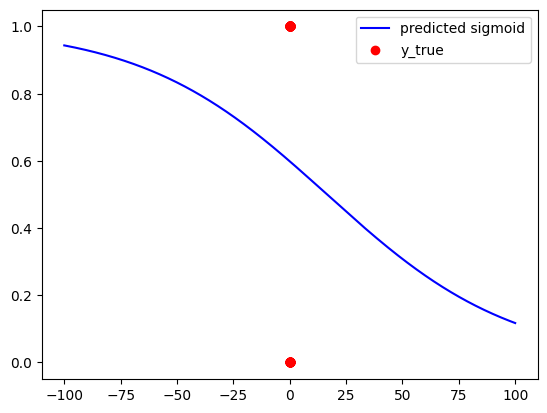

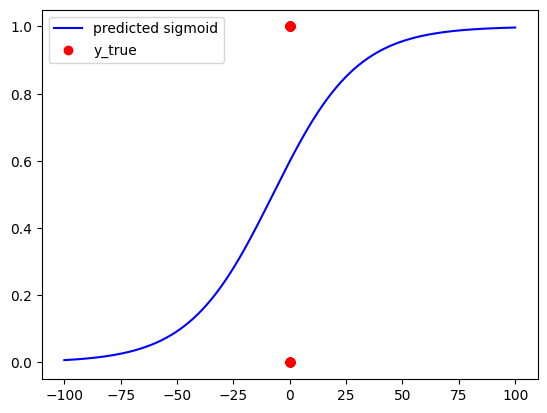

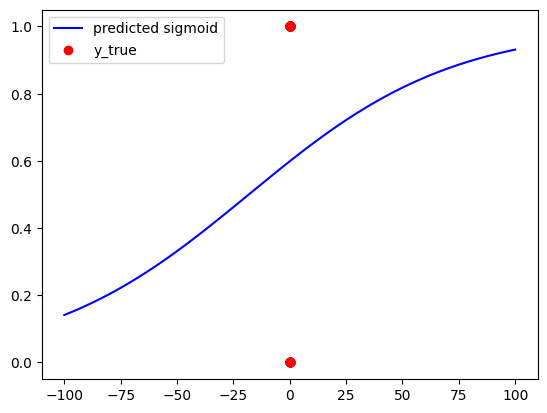

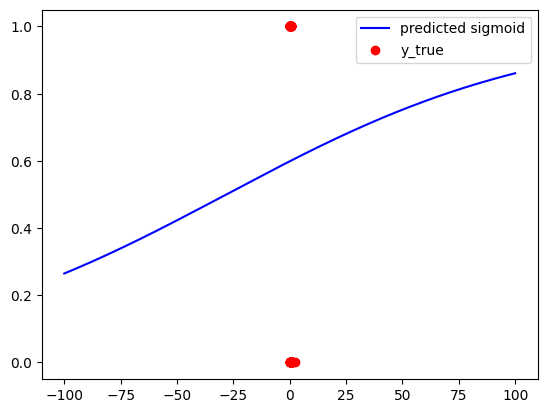

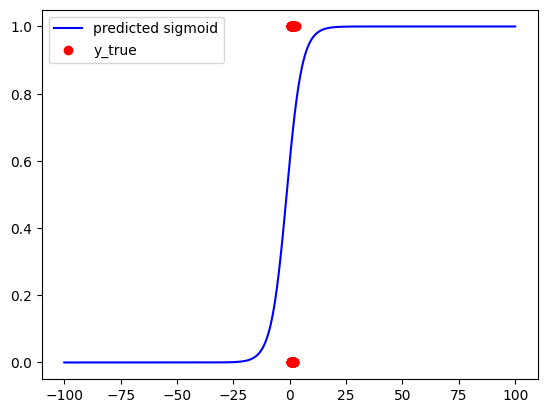

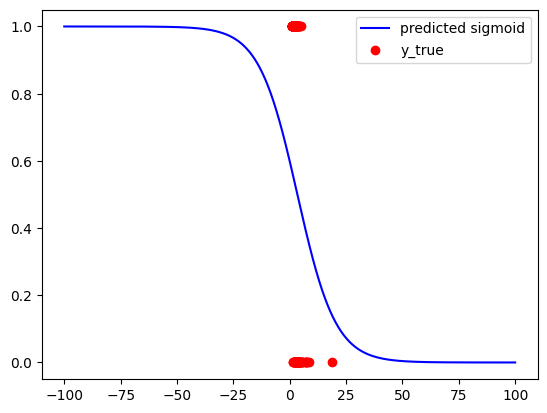

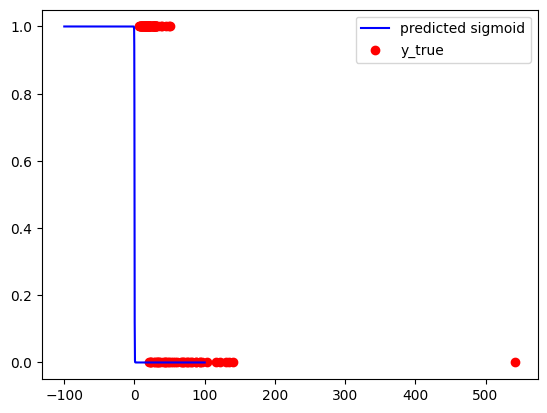

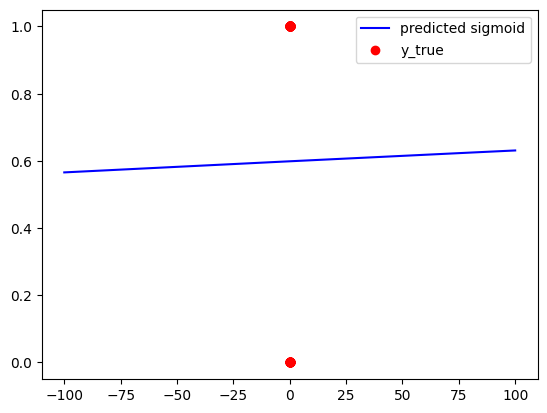

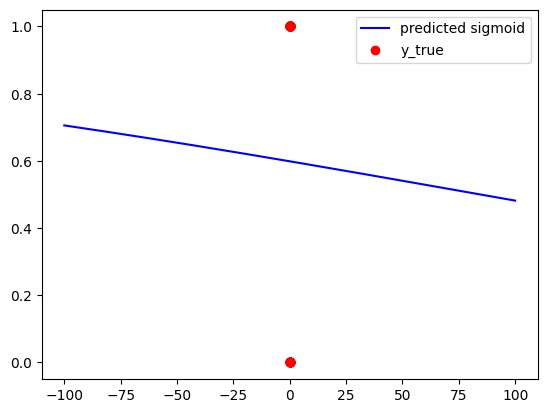

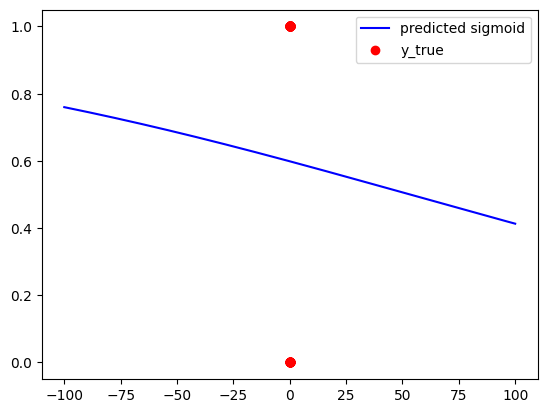

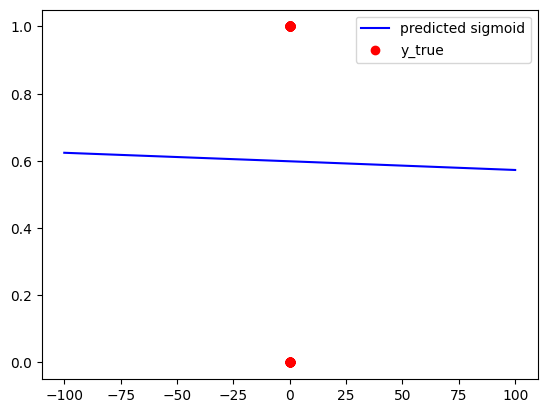

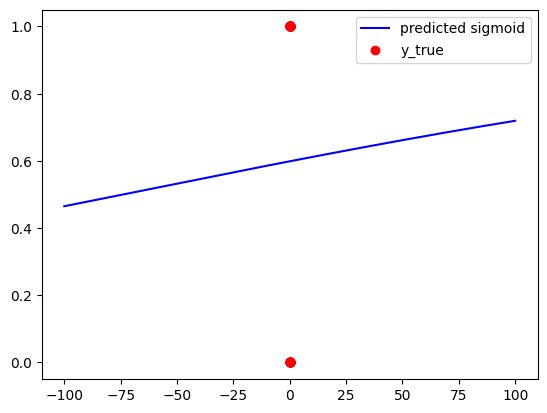

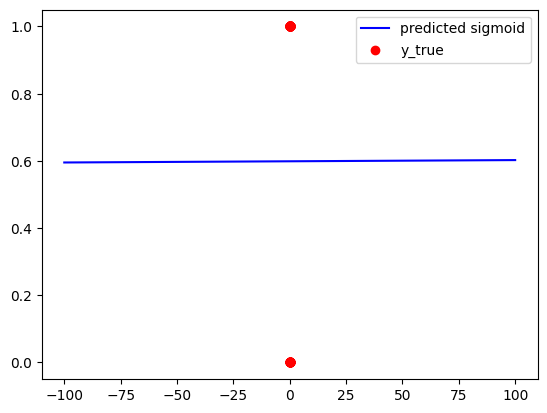

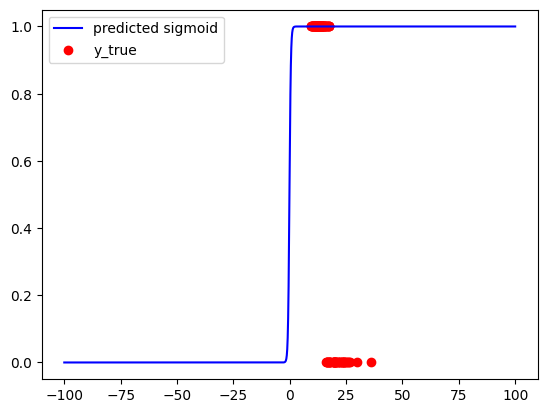

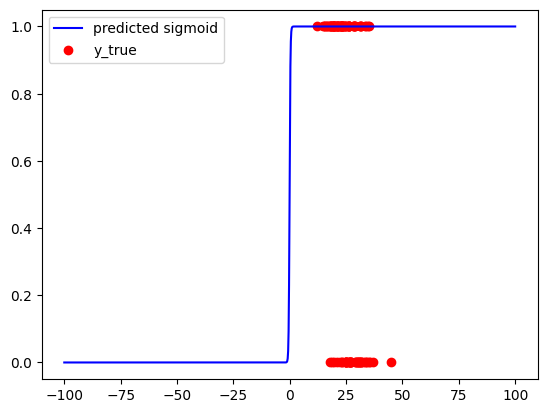

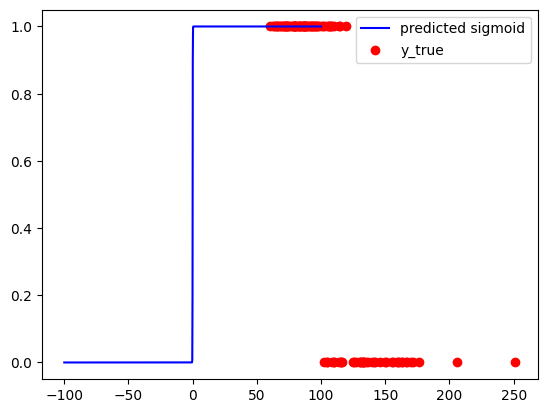

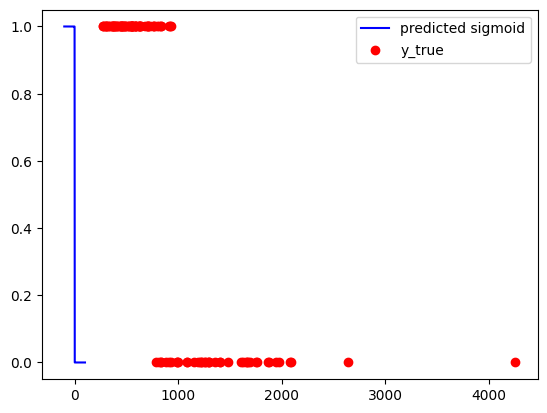

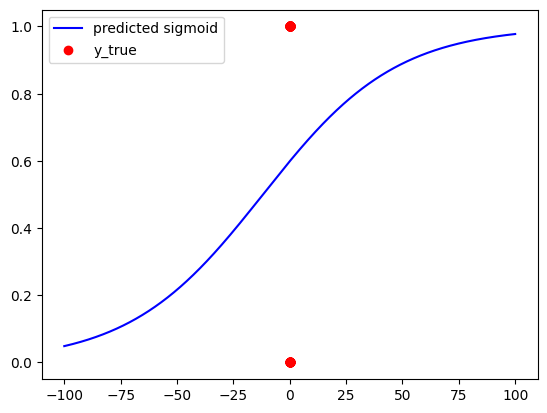

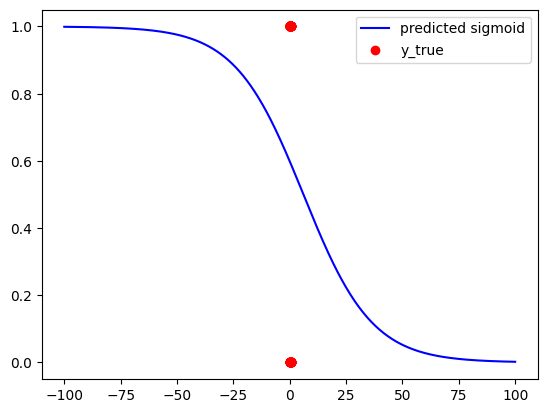

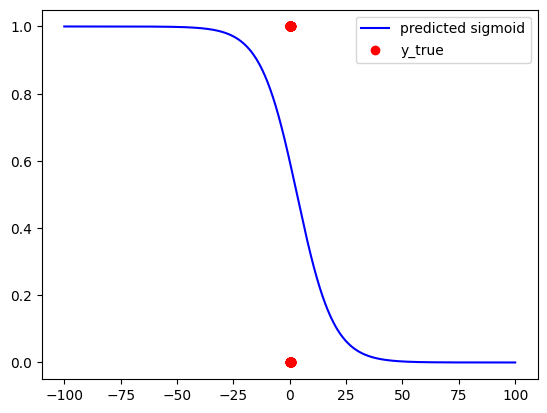

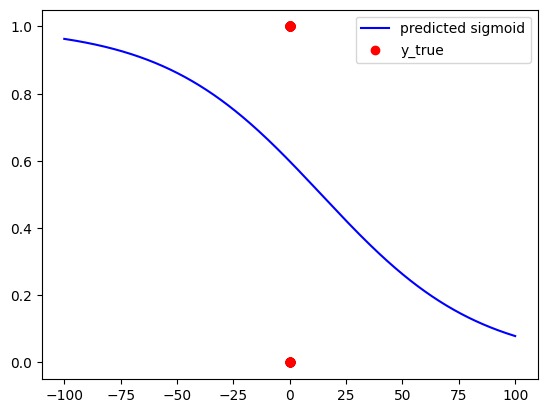

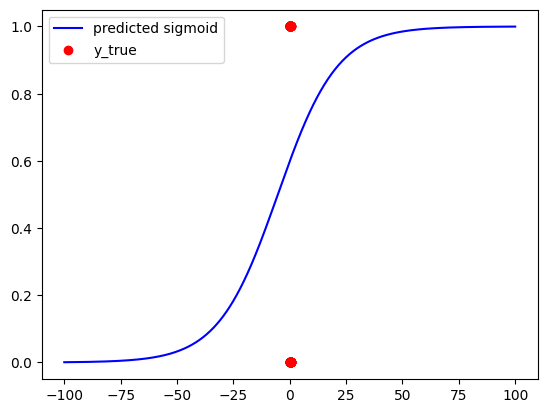

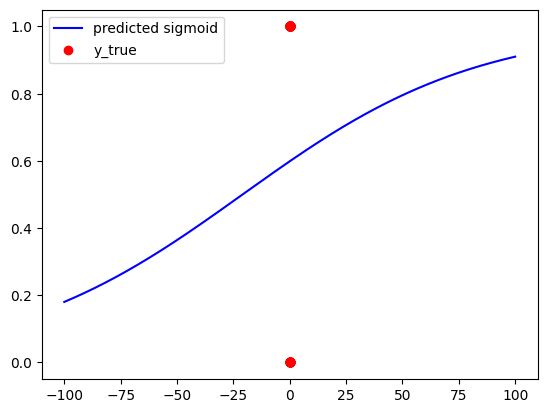

0.9210526315789473


In [117]:
import numpy as np
import pandas as pd

def sigmoid(x):
    return 1/(1+np.exp(-x))

# Define the sigmoid function
def plot_sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(w*x+b)))

    
def plot_logistic(Data, predictions, y_true, predicted_w, predicted_b):
    number_of_features = Data.shape[1]
    for f in range(number_of_features):
        X = Data[:,f]
        min_x = np.min(X) * -2
        max_x = np.max(X) * 2
        min_x = -100
        max_x = 100
        z = np.linspace(min_x, max_x, 1000)
        
        y = plot_sigmoid(z,predicted_w[f], predicted_b)
        plt.plot(z, y, 'b' , c = 'b' ,label = 'predicted sigmoid')
        plt.scatter(X, y_true, c= 'r' ,label='y_true')
        # plt.scatter(X, predictions, c= 'g' ,label='predicted probability')

        
        # h = 1/(1+np.exp(-(np.prod(w.T,X) + b)))
        # plt.scatter(X[:,0] , predictions)
        # plt.scatter(X[:,0],h[:,0])
        plt.legend()
        plt.show()

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for itr in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

            # if itr == self.n_iters-1:
                

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        plot_logistic(X , class_pred , class_pred , self.weights, self.bias)
        return class_pred
    
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
# Convert to DataFrame
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)
